<a href="https://colab.research.google.com/github/Stephen-Raj8746/Week1-StudentPerformance-EDA/blob/main/week%202%20covid-19%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [11]:
# Null values summary
missing = df.isnull().sum()
print("Missing values:\n", missing[missing > 0])

Missing values:
 iso_code                             264
continent                            528
total_cases                          603
new_cases                            803
new_cases_smoothed                  1585
total_deaths                         603
new_deaths                           803
new_deaths_smoothed                 1585
total_cases_per_million              867
new_cases_per_million                867
new_cases_smoothed_per_million      1650
total_deaths_per_million             867
new_deaths_per_million               867
new_deaths_smoothed_per_million     1650
new_tests                          29138
total_tests                        28763
total_tests_per_thousand           28763
new_tests_per_thousand             29138
new_tests_smoothed                 27217
new_tests_smoothed_per_thousand    27217
tests_per_case                     28636
positive_rate                      28252
tests_units                        26411
stringency_index                    7728

In [14]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [15]:
print(df.head())
print(df.describe())
countries = df['location'].nunique()
print("Number of countries/locations:", countries)
latest_date = df['date'].max()
latest_data = df[df['date'] == latest_date]

top_cases = latest_data[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False)
print("Most affected countries:\n", top_cases.head(10))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2019-12-31          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-01          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-02          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-03          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-04          0.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           0.0         0.0                  NaN  ...   
1                 NaN           0.0         0.0                  NaN  ...   
2                 NaN           0.0         0.0                  NaN  ...   
3                 NaN           0.0         0.0                  NaN  ...   
4                 NaN           0.0         0.0                  NaN  ...   

   gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0        1803.987              NaN   

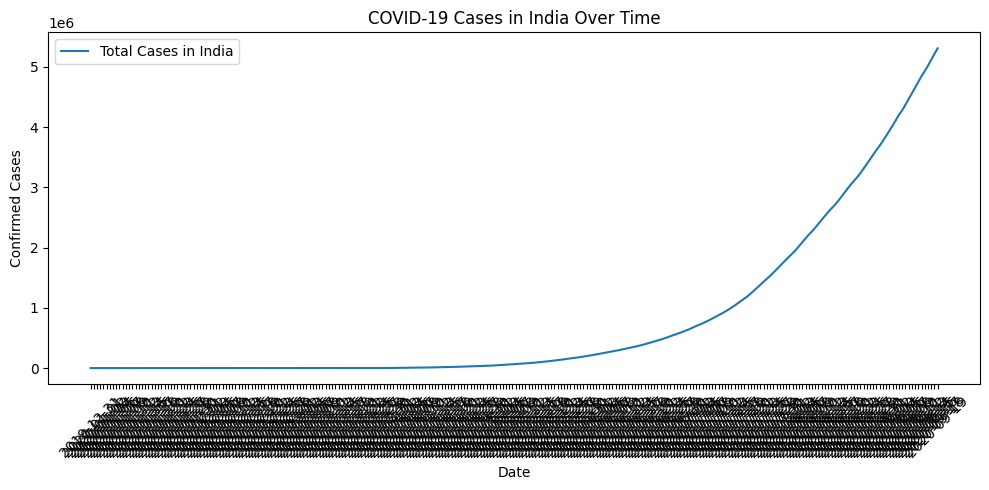

In [16]:
india = df[df['location'] == 'India']

plt.figure(figsize=(10,5))
plt.plot(india['date'], india['total_cases'], label='Total Cases in India')
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.title("COVID-19 Cases in India Over Time")
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-1182553030.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_deaths, x='total_deaths', y='location', palette='Reds_r')


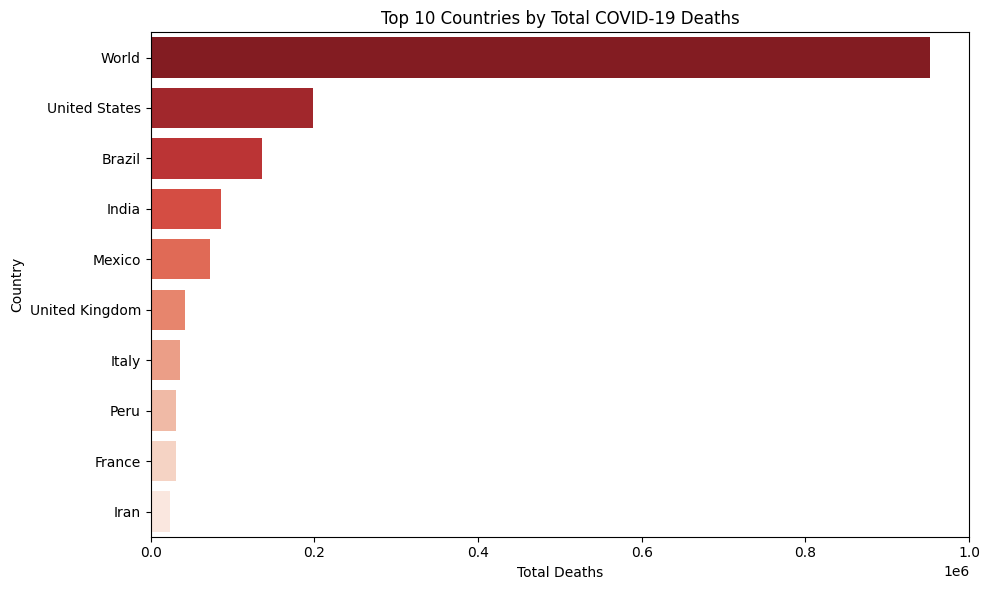

In [17]:
top_deaths = latest_data[['location', 'total_deaths']].dropna().sort_values(by='total_deaths', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_deaths, x='total_deaths', y='location', palette='Reds_r')
plt.title("Top 10 Countries by Total COVID-19 Deaths")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

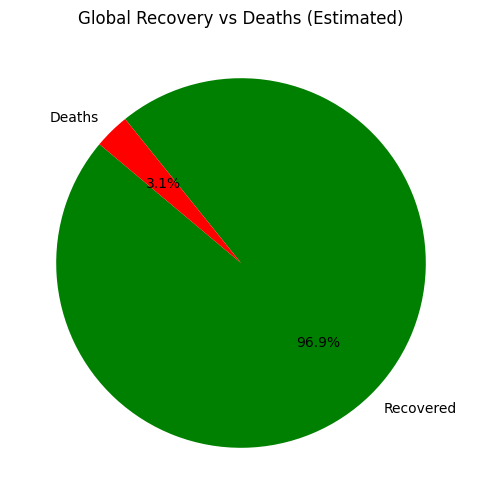

In [18]:
global_deaths = latest_data['total_deaths'].sum()
global_cases = latest_data['total_cases'].sum()
global_recovered = global_cases - global_deaths

labels = ['Recovered', 'Deaths']
sizes = [global_recovered, global_deaths]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red'])
plt.title("Global Recovery vs Deaths (Estimated)")
plt.show()

Observations from the COVID-19 Data


	1.	India had a big spike in cases after 2021, mainly during the second wave caused by the Delta variant. This wave was one of the most severe and showed how quickly the virus could spread.



	2.	The countries most affected by total cases are the USA, India, Brazil, and Russia. These countries faced repeated waves of infections, often due to large populations and delays in lockdowns or vaccine rollouts.



	3.	Countries with larger populations and weaker healthcare systems saw more deaths. This shows how important it is to have strong hospitals, medical supplies, and trained staff.



	4.	Globally, far more people recovered than died, which is a good sign. It means that most people who got COVID-19 survived, thanks to better treatments and vaccines.



	5.	Not all countries reported their data in the same way. Some had missing or delayed updates, especially in recovery and testing numbers. So, comparing countries directly might not always be accurate.


	6.	Quick testing, early detection, and strong public health measures made a big difference in controlling the virus.


	7.	The world worked together in many ways, from developing vaccines to sharing data. This cooperation helped save lives and speed up the recovery.